In [4]:
import rpy2.rinterface
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [9]:
%%R
#Homework 5
#4b
xiVals <- c(3.11, 1.16, 1.53, 1.45, 2.81, 2.07, 2.93, 4.44, 3.47, 4.73)
sum(log(xiVals))
n <- length(xiVals)
k <- 3
for (i in 1:5){
  k <- k - (-n*digamma(k)+sum(log(xiVals)))/(-n*trigamma(k))
}
k

###JUST FOR FUN let's check it with mle function
library(stats4)
minuslogl.gam <- function(kappa) {
  y <- dgamma(xiVals, shape = kappa, scale = 1)
  # return -sum ln(y)
  nLL <- -sum(log(y))
  return(nLL)
}

## Use MMEs as starting values
n <- length(xiVals)
kappa.mme <- (n*mean(xiVals)^2) / ((n-1)*var(xiVals))
theta.mme <- 1

## Calculate Gamma MLEs: 
fit.gam <- mle(minuslogl.gam, start = list(kappa = kappa.mme))
summary(fit.gam)
# :)

Maximum likelihood estimation

Call:
mle(minuslogl = minuslogl.gam, start = list(kappa = kappa.mme))

Coefficients:
      Estimate Std. Error
kappa 2.994057  0.5026128

-2 log L: 32.44543 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.02   77.65   96.87   99.82  118.03  260.71 


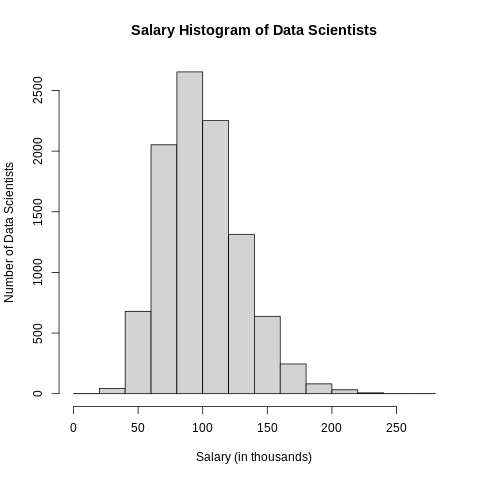

In [10]:
%%R

#5a
salarydata <- read.table("salary.txt", header = FALSE)
dsSals <- salarydata$V1
n <- length(dsSals)
hist(dsSals, main = "Salary Histogram of Data Scientists", xlab = "Salary (in thousands)", ylab = "Number of Data Scientists")
#The distribution appears slightly right-skewed, but not too far off center. (Right-skewed is generally expected for salary distributions)
summary(dsSals)
#the range is quite large, from approx 16k to 260k. A typical salary is likely between $90,000 and $100,000
#Summary relates how skewed the data is much better than the histogram does. Mean - Min = 83.8, whereas Max - Mean = 160.89
#The latter difference is almost double the former



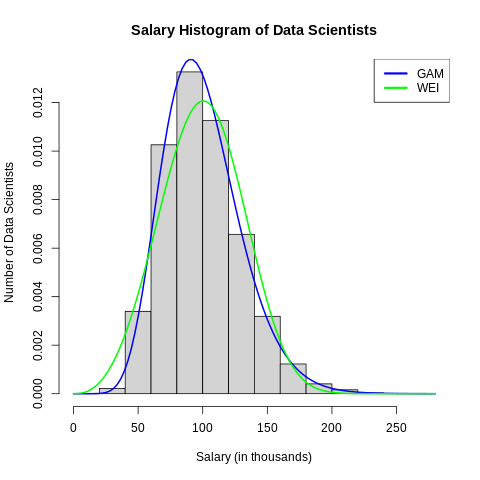

In [11]:
%%R
#5b

minuslogl.gam <- function(theta, kappa) {
  y <- dgamma(dsSals, shape = kappa, scale = theta)
  # return -sum ln(y)
  nLL <- -sum(log(y))
  return(nLL)
}

## Use MMEs as starting values
kappa.mme <- (n*mean(dsSals)^2) / ((n-1)*var(dsSals))
theta.mme <- ((n-1)*var(dsSals)) / (n*mean(dsSals))

## Calculate Gamma MLEs: 
fit.gam <- mle(minuslogl.gam, start = list(theta = theta.mme, kappa = kappa.mme))
summary(fit.gam)
theta.mle <- fit.gam@coef[1]
kappa.mle <- fit.gam@coef[2]

#5c
minuslogl.weib <- function(eta, beta) {
  y <- dweibull(dsSals, shape = beta, scale = eta)
  # return -sum ln(y)
  nLL <- -sum(log(y))
  return(nLL)
}

## Calculate Weibull MLEs: 
fit.wei <- mle(minuslogl.weib, start = list(eta = 1, beta = 1))
summary(fit.wei)
eta.mle <- fit.wei@coef[1]
beta.mle <- fit.wei@coef[2]
#5d
#note that this time we need to set freq to false
hist(dsSals, main = "Salary Histogram of Data Scientists", xlab = "Salary (in thousands)", ylab = "Number of Data Scientists", freq = FALSE)
curve(dgamma(x, shape = kappa.mle, scale = theta.mle), col="blue", lwd=2, add=TRUE)
curve(dweibull(x, shape = beta.mle, scale = eta.mle), col="green", lwd=2, add=TRUE)
legend("topright", c("GAM", "WEI"), col=c("blue", "green"), lwd=3)


In [12]:
%%R
#gamma does a better job. Weibull is not quite skewed enough :)
#5e
#want to know P(X > 200); using gamma as my chosen
richDS <- 1 - pgamma(200, shape = kappa.mle, scale = theta.mle)
richDS
#approx 0.35% of data scientists earn more than 200k a year


[1] 0.003463473
